<a href="https://colab.research.google.com/github/citjimm/DMDS/blob/main/pnew_j.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##START


#pre


In [168]:
import pandas as pd
Pre_int = pd.read_excel('https://github.com/citjimm/DMDS/raw/main/pre%20intv%20data.xlsx')  # Replace with your actual file path
Pre_int
Pre_int.columns


Index(['County Code', 'District Code', 'School Code', 'County Name',
       'District Name', 'School Name', 'DFG', 'Special Needs', 'Enroll',
       'Not Present', 'Voids', 'APA', 'Valid Scale', 'PP', 'P', 'AP',
       'Mean Scale', 'YEAR'],
      dtype='object')

In [169]:
Pre_int

,County Code,District Code,School Code,County Name,District Name,School Name,DFG,Special Needs,Enroll,Not Present,Voids,APA,Valid Scale,PP,P,AP,Mean Scale,YEAR
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Enroll,Not Present,Voids,APA,Valid Scale,PP,P,AP,Mean Scale,YEAR
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lang,Lang,Lang,Lang,Lang,Lang,Lang,Lang,Lang,year
2,ST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104791,230,429,813,103319,17.8,67.7,14.5,221.2,2009
3,7,680.0,,CAMDEN,CAMDEN CITY,CAMDEN CITY,A,Y,1170,5,9,3,1153,80.1,19.8,0.1,177.2,2009
4,7,680.0,100,CAMDEN,CAMDEN CITY,BONSALL,A,Y,74,1,0,0,73,76.7,21.9,1.4,176.2,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,7,680.0,320,CAMDEN,CAMDEN CITY,U S WIGGINS,A,Y,63,1,2,0,60,85,15,0,178.8,2014
140,7,680.0,80,CAMDEN,CAMDEN CITY,VETERANS MEMORIAL MIDDLE,A,Y,43,0,0,0,43,72.1,27.9,0,183.6,2014
141,7,680.0,340,CAMDEN,CAMDEN CITY,WHITTIER,A,Y,30,0,0,0,30,83.3,16.7,0,178.2,2014
142,7,680.0,360,CAMDEN,CAMDEN CITY,YORKSHIP,A,Y,58,0,0,0,58,79.3,20.7,0,180,2014


In [170]:
print(Pre_int.dtypes)

County Code       object
District Code    float64
School Code       object
County Name       object
District Name     object
School Name       object
DFG               object
Special Needs     object
Enroll            object
Not Present       object
Voids             object
APA               object
Valid Scale       object
PP                object
P                 object
AP                object
Mean Scale        object
YEAR              object
dtype: object


In [171]:

columns_to_convert = ['Enroll', 'Valid Scale', 'PP', 'P', 'AP', 'Mean Scale']

for column in columns_to_convert:
    Pre_int[column] = pd.to_numeric(Pre_int[column], errors='coerce')

Pre_int['YEAR'] = pd.to_numeric(Pre_int['YEAR'], errors='coerce')



In [172]:
print(Pre_int.dtypes)

County Code       object
District Code    float64
School Code       object
County Name       object
District Name     object
School Name       object
DFG               object
Special Needs     object
Enroll           float64
Not Present       object
Voids             object
APA               object
Valid Scale      float64
PP               float64
P                float64
AP               float64
Mean Scale       float64
YEAR             float64
dtype: object


In [173]:
import numpy as np
import pandas as pd


camden_criteria = ((Pre_int['School Name'].str.contains('CAMDEN CITY', case=False, na=False)) &
                   (Pre_int['YEAR'] == 2009))

leap_criteria = ((Pre_int['School Name'].str.contains('LEAP ACADEMY UNIVERSITY CS', case=False, na=False)) &
                 (Pre_int['YEAR'] == 2009))

include_criteria = camden_criteria | leap_criteria

Pre_int_included_schools_2009 = Pre_int[include_criteria]


score_columns = ['PP', 'P', 'AP', 'Mean Scale']
count_column = 'Valid Scale'


weighted_sums_2009 = (Pre_int_included_schools_2009[score_columns].T * Pre_int_included_schools_2009[count_column]).T.sum()


total_valid_test_takers_2009 = Pre_int_included_schools_2009[count_column].sum()

weighted_averages_2009 = weighted_sums_2009 / total_valid_test_takers_2009

total_enrollment_2009 = Pre_int_included_schools_2009['Enroll'].sum()


weighted_averages_2009, total_valid_test_takers_2009, total_enrollment_2009

(PP             79.832261
 P              20.072607
 AP              0.095132
 Mean Scale    177.584571
 dtype: float64,
 1212.0,
 1229.0)

In [174]:
total_valid_test_takers_2009

1212.0

In [175]:
import pandas as pd
import numpy as np

years = [2009, 2010, 2011, 2012, 2013, 2014]

results = []

for year in years:
    camden_city_criteria = ((Pre_int['School Name'].str.contains('CAMDEN CITY', case=False, na=False)) &
                            (Pre_int['YEAR'] == year))

    charter_criteria = ((Pre_int['District Name'].str.contains('CHARTER', case=False, na=False)) &
                        (Pre_int['YEAR'] == year))


    combined_criteria = camden_city_criteria | charter_criteria


    preint_filtered = Pre_int[combined_criteria]

    score_columns = ['PP', 'P', 'AP', 'Mean Scale']
    count_column = 'Valid Scale'


    weighted_sums = (preint_filtered[score_columns].T * preint_filtered[count_column]).T.sum()
    total_valid_test_takers = preint_filtered[count_column].sum()
    total_enrollment = preint_filtered['Enroll'].sum()


    weighted_averages = weighted_sums / total_valid_test_takers


    results.append({
        'Year': year,
        'PP': weighted_averages.get('PP', np.nan),
        'P': weighted_averages.get('P', np.nan),
        'AP': weighted_averages.get('AP', np.nan),
        'Mean Scale Score': weighted_averages.get('Mean Scale', np.nan),
        'Total Valid Test Takers': total_valid_test_takers,
        'Total Enrollment': total_enrollment
    })


preintresults_df = pd.DataFrame(results)


print(preintresults_df)

   Year         PP          P        AP  Mean Scale Score  \
0  2009  79.832261  20.072607  0.095132        177.584571   
1  2010  82.513784  17.211028  0.275188        174.581203   
2  2011  79.890592  19.927526  0.181882        177.782230   
3  2012  73.681990  26.135506  0.182504        182.835163   
4  2013  71.009144  28.907383  0.083473        183.627097   
5  2014  72.833511  26.999911  0.166578        183.381956   

   Total Valid Test Takers  Total Enrollment  
0                   1212.0            1229.0  
1                   1197.0            1207.0  
2                   1148.0            1165.0  
3                   1166.0            1181.0  
4                   1192.0            1217.0  
5                   1125.0            1144.0  


In [176]:
preintresults_table = preintresults_df.to_string(index=False)
print(preintresults_table)


 Year        PP         P       AP  Mean Scale Score  Total Valid Test Takers  Total Enrollment
 2009 79.832261 20.072607 0.095132        177.584571                   1212.0            1229.0
 2010 82.513784 17.211028 0.275188        174.581203                   1197.0            1207.0
 2011 79.890592 19.927526 0.181882        177.782230                   1148.0            1165.0
 2012 73.681990 26.135506 0.182504        182.835163                   1166.0            1181.0
 2013 71.009144 28.907383 0.083473        183.627097                   1192.0            1217.0
 2014 72.833511 26.999911 0.166578        183.381956                   1125.0            1144.0


#state code

In [178]:
Pre_int

,County Code,District Code,School Code,County Name,District Name,School Name,DFG,Special Needs,Enroll,Not Present,Voids,APA,Valid Scale,PP,P,AP,Mean Scale,YEAR
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Present,Voids,APA,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lang,Lang,Lang,NaN,NaN,NaN,NaN,NaN,NaN
2,ST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104791.0,230,429,813,103319.0,17.8,67.7,14.5,221.2,2009.0
3,7,680.0,,CAMDEN,CAMDEN CITY,CAMDEN CITY,A,Y,1170.0,5,9,3,1153.0,80.1,19.8,0.1,177.2,2009.0
4,7,680.0,100,CAMDEN,CAMDEN CITY,BONSALL,A,Y,74.0,1,0,0,73.0,76.7,21.9,1.4,176.2,2009.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,7,680.0,320,CAMDEN,CAMDEN CITY,U S WIGGINS,A,Y,63.0,1,2,0,60.0,85.0,15.0,0.0,178.8,2014.0
140,7,680.0,80,CAMDEN,CAMDEN CITY,VETERANS MEMORIAL MIDDLE,A,Y,43.0,0,0,0,43.0,72.1,27.9,0.0,183.6,2014.0
141,7,680.0,340,CAMDEN,CAMDEN CITY,WHITTIER,A,Y,30.0,0,0,0,30.0,83.3,16.7,0.0,178.2,2014.0
142,7,680.0,360,CAMDEN,CAMDEN CITY,YORKSHIP,A,Y,58.0,0,0,0,58.0,79.3,20.7,0.0,180.0,2014.0


In [179]:
columns_to_convert = ['Enroll', 'Valid Scale', 'PP', 'P', 'AP', 'Mean Scale']

for column in columns_to_convert:
    Pre_int[column] = pd.to_numeric(Pre_int[column], errors='coerce')

Pre_int['YEAR'] = pd.to_numeric(Pre_int['YEAR'], errors='coerce')
Pre_int['YEAR'] = Pre_int['YEAR'].fillna(-1).astype(int)

Pre_int = Pre_int.dropna(subset=['YEAR'])
Pre_int['YEAR'] = Pre_int['YEAR'].astype(int)

rename
Pre_int = Pre_int.rename(columns={'YEAR':'Year'})
# Rename 'Year' to 'year'

# Verify the change
print(Pre_int.columns)


Index(['County Code', 'District Code', 'School Code', 'County Name',
       'District Name', 'School Name', 'DFG', 'Special Needs', 'Enroll',
       'Not Present', 'Voids', 'APA', 'Valid Scale', 'PP', 'P', 'AP',
       'Mean Scale', 'Year'],
      dtype='object')


In [180]:

state_data = Pre_int[Pre_int['County Code'] == 'ST']
state_data.dtypes
ST_Year=state_data.groupby('Year')[['PP', 'P', 'AP', 'Mean Scale', 'Valid Scale','Enroll']].mean()

ST_Year.dtypes
ST_Year

,PP,P,AP,Mean Scale,Valid Scale,Enroll
Year,,,,,,
2009,17.8,67.7,14.5,221.2,103319.0,104791.0
2010,40.3,54.1,5.6,203.6,101756.0,103215.0
2011,37.0,55.8,7.2,205.7,100389.0,101839.0
2012,33.2,63.1,3.6,205.7,101376.0,102905.0
2013,33.6,62.4,4.0,205.5,101517.0,102968.0
2014,34.4,61.2,4.3,205.8,99818.0,101424.0


In [181]:

ST_Year.rename(columns={'Mean Scale': 'Mean Scale Score'}, inplace=True)

print(ST_Year.columns)


Index(['PP', 'P', 'AP', 'Mean Scale Score', 'Valid Scale', 'Enroll'], dtype='object')


merging both

In [182]:
from os import rename

preintst = pd.merge( preintresults_df, ST_Year,  on='Year', how='left', suffixes=('', '_State_Avg'))

score_categories = ['PP', 'P', 'AP', 'Mean Scale Score']


for category in score_categories:
   preintst[f'Normalized {category}'] = preintst[category] - preintst[f'{category}_State_Avg']

normalized_columns = [f'Normalized {category}' for category in score_categories]
print(preintst[['Year'] + normalized_columns])


   Year  Normalized PP  Normalized P  Normalized AP  \
0  2009      62.032261    -47.627393     -14.404868   
1  2010      42.213784    -36.888972      -5.324812   
2  2011      42.890592    -35.872474      -7.018118   
3  2012      40.481990    -36.964494      -3.417496   
4  2013      37.409144    -33.492617      -3.916527   
5  2014      38.433511    -34.200089      -4.133422   

   Normalized Mean Scale Score  
0                   -43.615429  
1                   -29.018797  
2                   -27.917770  
3                   -22.864837  
4                   -21.872903  
5                   -22.418044  


In [183]:
selected_columns = ['Year'] + normalized_columns
prefinal_dataset = preintst[selected_columns]
prefinal_dataset

,Year,Normalized PP,Normalized P,Normalized AP,Normalized Mean Scale Score
0,2009,62.032261,-47.627393,-14.404868,-43.615429
1,2010,42.213784,-36.888972,-5.324812,-29.018797
2,2011,42.890592,-35.872474,-7.018118,-27.917770
3,2012,40.481990,-36.964494,-3.417496,-22.864837
4,2013,37.409144,-33.492617,-3.916527,-21.872903
5,2014,38.433511,-34.200089,-4.133422,-22.418044


In [184]:
prefinal_dataset.rename(columns={'Normalized Mean Scale Score': 'Normalized MEAN SCALE SCORE'}, inplace=True)

<ipython-input-184-a1cafc4e4c12>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prefinal_dataset.rename(columns={'Normalized Mean Scale Score': 'Normalized MEAN SCALE SCORE'}, inplace=True)


In [185]:
prefinal_dataset

,Year,Normalized PP,Normalized P,Normalized AP,Normalized MEAN SCALE SCORE
0,2009,62.032261,-47.627393,-14.404868,-43.615429
1,2010,42.213784,-36.888972,-5.324812,-29.018797
2,2011,42.890592,-35.872474,-7.018118,-27.917770
3,2012,40.481990,-36.964494,-3.417496,-22.864837
4,2013,37.409144,-33.492617,-3.916527,-21.872903
5,2014,38.433511,-34.200089,-4.133422,-22.418044


###post


In [186]:
import pandas as pd
post_int= pd.read_excel ('https://github.com/citjimm/DMDS/raw/main/post%20interv%20data%20.xlsx')
post_int.dtypes

COUNTY CODE                   object
COUNTY NAME                   object
DISTRICT CODE                float64
DISTRICT NAME                 object
SCHOOL CODE                  float64
SCHOOL NAME                   object
DFG                           object
SUBGROUP                      object
SUBGROUP_TYPE                 object
REGISTERED TO TEST            object
NOT TESTED ** (See Below)     object
VALID SCORES                  object
MEAN SCALE SCORE              object
L1 PERCENT                    object
L2 PERCENT                    object
L3 PERCENT                    object
L4 PERCENT                    object
L5 PERCENT                    object
Year                           int64
dtype: object

In [187]:
post_int.columns


Index(['COUNTY CODE', 'COUNTY NAME', 'DISTRICT CODE', 'DISTRICT NAME',
       'SCHOOL CODE', 'SCHOOL NAME', 'DFG', 'SUBGROUP', 'SUBGROUP_TYPE',
       'REGISTERED TO TEST', 'NOT TESTED ** (See Below)', 'VALID SCORES',
       'MEAN SCALE SCORE', 'L1 PERCENT', 'L2 PERCENT', 'L3 PERCENT',
       'L4 PERCENT', 'L5 PERCENT', 'Year'],
      dtype='object')

In [188]:
import pandas as pd
# Convert score and count columns to numeric, coercing errors to NaN, for the entire DataFrame
columns_to_convert = [ 'VALID SCORES', 'L1 PERCENT', 'L2 PERCENT', 'L3 PERCENT', 'L4 PERCENT', 'L5 PERCENT', 'MEAN SCALE SCORE']  # Adjust this list as needed

for column in columns_to_convert:post_int[column] = pd.to_numeric(post_int[column], errors='coerce')

post_int.dtypes



COUNTY CODE                   object
COUNTY NAME                   object
DISTRICT CODE                float64
DISTRICT NAME                 object
SCHOOL CODE                  float64
SCHOOL NAME                   object
DFG                           object
SUBGROUP                      object
SUBGROUP_TYPE                 object
REGISTERED TO TEST            object
NOT TESTED ** (See Below)     object
VALID SCORES                 float64
MEAN SCALE SCORE             float64
L1 PERCENT                   float64
L2 PERCENT                   float64
L3 PERCENT                   float64
L4 PERCENT                   float64
L5 PERCENT                   float64
Year                           int64
dtype: object

In [189]:

Chartersinterest = ['Charters',]
subgroup_of_interest = 'Total'

charters18_19 = post_int[(post_int['COUNTY NAME'].isin(Chartersinterest)) & (post_int['SUBGROUP'] == subgroup_of_interest)]

print(charters18_19)

     COUNTY CODE COUNTY NAME  DISTRICT CODE                    DISTRICT NAME  \
1060          80    Charters         7109.0       Leap Academy University Cs   
1072          80    Charters         6086.0                Hope Community Cs   
1081          80    Charters         6107.0  Camden’S Promise Charter School   
1094          80    Charters         6240.0      Freedom Prep Charter School   
1309          80    Charters         7109.0       Leap Academy University Cs   
1321          80    Charters         6086.0                Hope Community Cs   
1333          80    Charters         6107.0  Camden’S Promise Charter School   
1347          80    Charters         6240.0      Freedom Prep Charter School   

      SCHOOL CODE                             SCHOOL NAME DFG SUBGROUP  \
1060        931.0  Leap Academy University Charter School   R    Total   
1072        972.0                       Hope Community Cs   R    Total   
1081        998.0         Camden's Promise Charter School

In [190]:

Chartersinterest = ['CHARTERS',]
subgroup_of_interest = 'TOTAL'

charters15_17 = post_int[(post_int['COUNTY NAME'].isin(Chartersinterest)) & (post_int['SUBGROUP'] == subgroup_of_interest)]

print(charters15_17)


    COUNTY CODE COUNTY NAME  DISTRICT CODE                    DISTRICT NAME  \
221          80    CHARTERS         7109.0       LEAP ACADEMY UNIVERSITY CS   
234          80    CHARTERS         6024.0    CAMDEN'S PRIDE CHARTER SCHHOL   
475          80    CHARTERS         6240.0      FREEDOM PREP CHARTER SCHOOL   
487          80    CHARTERS         7109.0       LEAP ACADEMY UNIVERSITY CS   
501          80    CHARTERS         6086.0                HOPE COMMUNITY CS   
526          80    CHARTERS         6063.0  CAMDEN COMMUNITY CHARTER SCHOOL   
539          80    CHARTERS         6063.0  CAMDEN COMMUNITY CHARTER SCHOOL   
780          80    CHARTERS         6063.0  CAMDEN COMMUNITY CHARTER SCHOOL   
794          80    CHARTERS         7109.0       LEAP ACADEMY UNIVERSITY CS   
808          80    CHARTERS         6086.0                HOPE COMMUNITY CS   
820          80    CHARTERS         6240.0      FREEDOM PREP CHARTER SCHOOL   

     SCHOOL CODE                             SCHOOL

In [191]:
# Concatenate charters15_17 and charters18_19 DataFrames
merged_charters = pd.concat([charters15_17, charters18_19])

# Reset the index of the new DataFrame if needed
merged_charters


,COUNTY CODE,COUNTY NAME,DISTRICT CODE,DISTRICT NAME,SCHOOL CODE,SCHOOL NAME,DFG,SUBGROUP,SUBGROUP_TYPE,REGISTERED TO TEST,NOT TESTED ** (See Below),VALID SCORES,MEAN SCALE SCORE,L1 PERCENT,L2 PERCENT,L3 PERCENT,L4 PERCENT,L5 PERCENT,Year
221,80,CHARTERS,7109.0,LEAP ACADEMY UNIVERSITY CS,931.0,LEAP ACADEMY UNIVERSITY CHARTER SCHOOL,R,TOTAL,ALL STUDENTS,*,*,120.0,729.0,28.3,17.5,24.2,26.7,3.3,2015
234,80,CHARTERS,6024.0,CAMDEN'S PRIDE CHARTER SCHHOL,906.0,CAMDEN'S PRIDE CHARTER SCHOOL,R,TOTAL,ALL STUDENTS,*,*,48.0,746.0,4.2,20.8,39.6,33.3,2.1,2015
475,80,CHARTERS,6240.0,FREEDOM PREP CHARTER SCHOOL,900.0,FREEDOM PREP CHARTER SCHOOL,R,TOTAL,ALL STUDENTS,*,*,56.0,712.0,37.5,32.1,16.1,12.5,1.8,2016
487,80,CHARTERS,7109.0,LEAP ACADEMY UNIVERSITY CS,931.0,LEAP ACADEMY UNIVERSITY CHARTER SCHOOL,R,TOTAL,ALL STUDENTS,*,*,117.0,732.0,14.5,29.9,25.6,29.9,0.0,2016
501,80,CHARTERS,6086.0,HOPE COMMUNITY CS,972.0,HOPE COMMUNITY CS,R,TOTAL,ALL STUDENTS,*,*,48.0,721.0,25.0,31.3,25.0,18.8,0.0,2016
526,80,CHARTERS,6063.0,CAMDEN COMMUNITY CHARTER SCHOOL,945.0,CAMDEN COMMUNITY CHARTER SCHOOL,R,TOTAL,ALL STUDENTS,*,*,100.0,703.0,43.0,33.0,17.0,7.0,0.0,2016
539,80,CHARTERS,6063.0,CAMDEN COMMUNITY CHARTER SCHOOL,945.0,CAMDEN COMMUNITY CHARTER SCHOOL,R,TOTAL,ALL STUDENTS,*,*,23.0,716.0,26.1,26.1,39.1,8.7,0.0,2015
780,80,CHARTERS,6063.0,CAMDEN COMMUNITY CHARTER SCHOOL,945.0,CAMDEN COMMUNITY CHARTER SCHOOL,R,TOTAL,ALL STUDENTS,*,*,132.0,702.0,49.2,28.0,14.4,8.3,0.0,2017
794,80,CHARTERS,7109.0,LEAP ACADEMY UNIVERSITY CS,931.0,LEAP ACADEMY UNIVERSITY CHARTER SCHOOL,R,TOTAL,ALL STUDENTS,*,*,123.0,716.0,32.5,27.6,22.8,17.1,0.0,2017
808,80,CHARTERS,6086.0,HOPE COMMUNITY CS,972.0,HOPE COMMUNITY CS,R,TOTAL,ALL STUDENTS,*,*,50.0,721.0,32.0,28.0,20.0,18.0,2.0,2017


In [192]:

schools_of_interest = ['Camden City', 'Mastery Schools Of Camden Inc.', 'Kipp: Cooper Norcross A New Jersey Nonprofit Corporation','Camden Prep Inc.' ]
subgroup_of_interest = 'Total'
Citydistrict2 = post_int[(post_int['SCHOOL NAME'].isin(schools_of_interest)) & (post_int['SUBGROUP'] == subgroup_of_interest)]

print(Citydistrict2)

     COUNTY CODE COUNTY NAME  DISTRICT CODE  \
1018           7      Camden         1799.0   
1032           7      Camden         1801.0   
1044           7      Camden         1802.0   
1267           7      Camden         1799.0   
1281           7      Camden         1801.0   
1294           7      Camden         1802.0   

                                          DISTRICT NAME  SCHOOL CODE  \
1018  Kipp: Cooper Norcross A New Jersey Nonprofit C...        111.0   
1032                                   Camden Prep Inc.        113.0   
1044                     Mastery Schools Of Camden Inc.        112.0   
1267  Kipp: Cooper Norcross, A New Jersey Nonprofit ...        111.0   
1281                                  Camden Prep, Inc.        113.0   
1294                    Mastery Schools Of Camden, Inc.        112.0   

                                            SCHOOL NAME DFG SUBGROUP  \
1018  Kipp: Cooper Norcross A New Jersey Nonprofit C...  ND    Total   
1032                 

In [193]:
import pandas as pd

schools_of_interest = ['CAMDEN CITY', 'MASTERY SCHOOLS OF CAMDEN', 'KIPP: COOPER NORCROSS A NEW JERSEY NONPROFIT CORPORATION','CAMDEN PREP INC.' ]
subgroup_of_interest = 'TOTAL'
Citydistrict1 = post_int[(post_int['SCHOOL NAME'].isin(schools_of_interest)) & (post_int['SUBGROUP'] == subgroup_of_interest)]


print(Citydistrict1)


    COUNTY CODE COUNTY NAME  DISTRICT CODE  \
195           7      CAMDEN          680.0   
210           7      CAMDEN         1802.0   
438           7      CAMDEN          680.0   
454           7      CAMDEN         1801.0   
727           7      CAMDEN          680.0   
741           7      CAMDEN         1799.0   
754           7      CAMDEN         1801.0   

                                         DISTRICT NAME  SCHOOL CODE  \
195                                        CAMDEN CITY          NaN   
210                          MASTERY SCHOOLS OF CAMDEN        112.0   
438                                        CAMDEN CITY          NaN   
454                                   CAMDEN PREP INC.        113.0   
727                                        CAMDEN CITY          NaN   
741  KIPP: COOPER NORCROSS A NEW JERSEY NONPROFIT C...        111.0   
754                                   CAMDEN PREP INC.        113.0   

                                           SCHOOL NAME DFG SUB

In [194]:
Citydistrict0 = pd.concat([Citydistrict1, Citydistrict2])
Citydistrict0

,COUNTY CODE,COUNTY NAME,DISTRICT CODE,DISTRICT NAME,SCHOOL CODE,SCHOOL NAME,DFG,SUBGROUP,SUBGROUP_TYPE,REGISTERED TO TEST,NOT TESTED ** (See Below),VALID SCORES,MEAN SCALE SCORE,L1 PERCENT,L2 PERCENT,L3 PERCENT,L4 PERCENT,L5 PERCENT,Year
195,7,CAMDEN,680.0,CAMDEN CITY,NaN,CAMDEN CITY,A,TOTAL,ALL STUDENTS,942,121,821.0,698.0,54.6,26.4,13.5,5.5,0.0,2015
210,7,CAMDEN,1802.0,MASTERY SCHOOLS OF CAMDEN,112.0,MASTERY SCHOOLS OF CAMDEN,ND,TOTAL,ALL STUDENTS,*,*,72.0,704.0,50.0,27.8,15.3,6.9,0.0,2015
438,7,CAMDEN,680.0,CAMDEN CITY,NaN,CAMDEN CITY,A,TOTAL,ALL STUDENTS,*,*,721.0,704.0,48.3,25.7,16.9,9.2,0.0,2016
454,7,CAMDEN,1801.0,CAMDEN PREP INC.,113.0,CAMDEN PREP INC.,ND,TOTAL,ALL STUDENTS,*,*,43.0,717.0,30.2,30.2,27.9,11.6,0.0,2016
727,7,CAMDEN,680.0,CAMDEN CITY,NaN,CAMDEN CITY,A,TOTAL,ALL STUDENTS,580,30,550.0,711.0,41.6,23.3,21.3,13.8,0.0,2017
741,7,CAMDEN,1799.0,KIPP: COOPER NORCROSS A NEW JERSEY NONPROFIT C...,111.0,KIPP: COOPER NORCROSS A NEW JERSEY NONPROFIT C...,ND,TOTAL,ALL STUDENTS,*,*,35.0,700.0,60.0,11.4,17.1,11.4,0.0,2017
754,7,CAMDEN,1801.0,CAMDEN PREP INC.,113.0,CAMDEN PREP INC.,ND,TOTAL,ALL STUDENTS,*,*,51.0,725.0,19.6,39.2,17.6,23.5,0.0,2017
1018,7,Camden,1799.0,Kipp: Cooper Norcross A New Jersey Nonprofit C...,111.0,Kipp: Cooper Norcross A New Jersey Nonprofit C...,ND,Total,All Students,*,*,133.0,727.0,27.8,18.8,23.3,29.3,0.8,2018
1032,7,Camden,1801.0,Camden Prep Inc.,113.0,Camden Prep Inc.,ND,Total,All Students,*,*,87.0,742.0,14.9,16.1,24.1,37.9,6.9,2018
1044,7,Camden,1802.0,Mastery Schools Of Camden Inc.,112.0,Mastery Schools Of Camden Inc.,ND,Total,All Students,*,*,241.0,702.0,50.2,22.8,19.1,7.9,0.0,2018


In [195]:
# Concatenate charters15_17 and charters18_19 DataFrames
allSchools = pd.concat([merged_charters, Citydistrict0])

# Reset the index of the new DataFrame if needed
print(allSchools)

     COUNTY CODE COUNTY NAME  DISTRICT CODE  \
221           80    CHARTERS         7109.0   
234           80    CHARTERS         6024.0   
475           80    CHARTERS         6240.0   
487           80    CHARTERS         7109.0   
501           80    CHARTERS         6086.0   
526           80    CHARTERS         6063.0   
539           80    CHARTERS         6063.0   
780           80    CHARTERS         6063.0   
794           80    CHARTERS         7109.0   
808           80    CHARTERS         6086.0   
820           80    CHARTERS         6240.0   
1060          80    Charters         7109.0   
1072          80    Charters         6086.0   
1081          80    Charters         6107.0   
1094          80    Charters         6240.0   
1309          80    Charters         7109.0   
1321          80    Charters         6086.0   
1333          80    Charters         6107.0   
1347          80    Charters         6240.0   
195            7      CAMDEN          680.0   
210          

In [196]:
allSchools.columns
# List of columns to capitalize
columns_to_capitalize = [ 'DISTRICT NAME', 'SCHOOL NAME']

# Capitalize each column in the list
for column in columns_to_capitalize:
    allSchools[column] = allSchools[column].str.upper()
allSchools

,COUNTY CODE,COUNTY NAME,DISTRICT CODE,DISTRICT NAME,SCHOOL CODE,SCHOOL NAME,DFG,SUBGROUP,SUBGROUP_TYPE,REGISTERED TO TEST,NOT TESTED ** (See Below),VALID SCORES,MEAN SCALE SCORE,L1 PERCENT,L2 PERCENT,L3 PERCENT,L4 PERCENT,L5 PERCENT,Year
221,80,CHARTERS,7109.0,LEAP ACADEMY UNIVERSITY CS,931.0,LEAP ACADEMY UNIVERSITY CHARTER SCHOOL,R,TOTAL,ALL STUDENTS,*,*,120.0,729.0,28.3,17.5,24.2,26.7,3.3,2015
234,80,CHARTERS,6024.0,CAMDEN'S PRIDE CHARTER SCHHOL,906.0,CAMDEN'S PRIDE CHARTER SCHOOL,R,TOTAL,ALL STUDENTS,*,*,48.0,746.0,4.2,20.8,39.6,33.3,2.1,2015
475,80,CHARTERS,6240.0,FREEDOM PREP CHARTER SCHOOL,900.0,FREEDOM PREP CHARTER SCHOOL,R,TOTAL,ALL STUDENTS,*,*,56.0,712.0,37.5,32.1,16.1,12.5,1.8,2016
487,80,CHARTERS,7109.0,LEAP ACADEMY UNIVERSITY CS,931.0,LEAP ACADEMY UNIVERSITY CHARTER SCHOOL,R,TOTAL,ALL STUDENTS,*,*,117.0,732.0,14.5,29.9,25.6,29.9,0.0,2016
501,80,CHARTERS,6086.0,HOPE COMMUNITY CS,972.0,HOPE COMMUNITY CS,R,TOTAL,ALL STUDENTS,*,*,48.0,721.0,25.0,31.3,25.0,18.8,0.0,2016
526,80,CHARTERS,6063.0,CAMDEN COMMUNITY CHARTER SCHOOL,945.0,CAMDEN COMMUNITY CHARTER SCHOOL,R,TOTAL,ALL STUDENTS,*,*,100.0,703.0,43.0,33.0,17.0,7.0,0.0,2016
539,80,CHARTERS,6063.0,CAMDEN COMMUNITY CHARTER SCHOOL,945.0,CAMDEN COMMUNITY CHARTER SCHOOL,R,TOTAL,ALL STUDENTS,*,*,23.0,716.0,26.1,26.1,39.1,8.7,0.0,2015
780,80,CHARTERS,6063.0,CAMDEN COMMUNITY CHARTER SCHOOL,945.0,CAMDEN COMMUNITY CHARTER SCHOOL,R,TOTAL,ALL STUDENTS,*,*,132.0,702.0,49.2,28.0,14.4,8.3,0.0,2017
794,80,CHARTERS,7109.0,LEAP ACADEMY UNIVERSITY CS,931.0,LEAP ACADEMY UNIVERSITY CHARTER SCHOOL,R,TOTAL,ALL STUDENTS,*,*,123.0,716.0,32.5,27.6,22.8,17.1,0.0,2017
808,80,CHARTERS,6086.0,HOPE COMMUNITY CS,972.0,HOPE COMMUNITY CS,R,TOTAL,ALL STUDENTS,*,*,50.0,721.0,32.0,28.0,20.0,18.0,2.0,2017


##aggregating

In [197]:

allSchools['Year'] = pd.to_numeric(allSchools['Year'], errors='coerce')
allSchools['VALID SCORES'] = pd.to_numeric(allSchools['VALID SCORES'], errors='coerce')

score_columns = ['L1 PERCENT', 'L2 PERCENT', 'L3 PERCENT', 'L4 PERCENT', 'L5 PERCENT', 'MEAN SCALE SCORE']


for column in score_columns:
    allSchools[column] = pd.to_numeric(allSchools[column], errors='coerce')


results = []

unique_years = allSchools['Year'].dropna().unique()

for year in unique_years:
    postint_filtered = allSchools[allSchools['Year'] == year]

    weighted_sums = (postint_filtered[score_columns].multiply(postint_filtered['VALID SCORES'], axis="index")).sum()
    total_valid_scores = postint_filtered['VALID SCORES'].sum()

    weighted_averages = weighted_sums / total_valid_scores

    results.append({
        'Year': year,
        **weighted_averages.to_dict(),
        'Total Valid Scores': total_valid_scores
    })

postintresults = pd.DataFrame(results)

print(postintresults)


   Year  L1 PERCENT  L2 PERCENT  L3 PERCENT  L4 PERCENT  L5 PERCENT  \
0  2015   48.546587   25.253413   16.502952    9.238745    0.458303   
1  2016   41.861198   27.582120   18.600369   11.919539    0.092903   
2  2017   39.668442   24.930251   20.520101   14.557990    0.301307   
3  2018   30.748652   19.339583   23.038113   23.387010    3.432475   
4  2019   28.489896   20.345466   20.979145   26.563342    3.630570   

   MEAN SCALE SCORE  Total Valid Scores  
0        704.337638              1084.0  
1        708.607373              1085.0  
2        712.125628               995.0  
3        724.878676               816.0  
4        727.450777               772.0  


In [198]:
allSchools.columns

Index(['COUNTY CODE', 'COUNTY NAME', 'DISTRICT CODE', 'DISTRICT NAME',
       'SCHOOL CODE', 'SCHOOL NAME', 'DFG', 'SUBGROUP', 'SUBGROUP_TYPE',
       'REGISTERED TO TEST', 'NOT TESTED ** (See Below)', 'VALID SCORES',
       'MEAN SCALE SCORE', 'L1 PERCENT', 'L2 PERCENT', 'L3 PERCENT',
       'L4 PERCENT', 'L5 PERCENT', 'Year'],
      dtype='object')

In [199]:
import pandas as pd

post_int['COUNTY CODE'] = post_int['COUNTY CODE'].str.upper()
post_int['SUBGROUP'] = post_int['SUBGROUP'].str.upper()

state_level_data = post_int[((post_int['COUNTY CODE'] == 'ST') | (post_int['COUNTY CODE'] == 'STATE')) &
                            (post_int['SUBGROUP'] == 'TOTAL')]

stgrouped_data = state_level_data.groupby('Year')[['L1 PERCENT', 'L2 PERCENT', 'L3 PERCENT', 'L4 PERCENT', 'L5 PERCENT', 'MEAN SCALE SCORE']].mean()

print(stgrouped_data)


      L1 PERCENT  L2 PERCENT  L3 PERCENT  L4 PERCENT  L5 PERCENT  \
Year                                                               
2015        15.1        17.8        23.7        38.6         4.9   
2016        13.5        16.0        23.0        41.3         6.2   
2017        12.7        14.4        22.5        42.9         7.5   
2018        13.5        13.5        21.4        43.5         8.1   
2019        14.0        14.4        21.4        42.8         7.4   

      MEAN SCALE SCORE  
Year                    
2015             743.0  
2016             746.0  
2017             749.0  
2018             750.0  
2019             748.0  


##normalized post

In [200]:
# Merge 'results_df' with 'grouped_data' to align school scores with state averages
postintST = pd.merge(postintresults, stgrouped_data, on='Year', how='left', suffixes=('', '_State_Avg'))

# List of score categories for normalization
score_categories = ['L1 PERCENT', 'L2 PERCENT', 'L3 PERCENT', 'L4 PERCENT', 'L5 PERCENT', 'MEAN SCALE SCORE']

# Calculate normalized scores by subtracting the state averages
for category in score_categories:
    norm_col_name = f'Normalized {category}'
    state_avg_col_name = f'{category}_State_Avg'
    postintST[norm_col_name] = postintST[category] - postintST[state_avg_col_name]

# Columns relevant to normalized scores for verification
normalized_columns = [f'Normalized {category}' for category in score_categories]

# Displaying the DataFrame including Year and normalized scores
print(postintST[['Year'] + normalized_columns])


   Year  Normalized L1 PERCENT  Normalized L2 PERCENT  Normalized L3 PERCENT  \
0  2015              33.446587               7.453413              -7.197048   
1  2016              28.361198              11.582120              -4.399631   
2  2017              26.968442              10.530251              -1.979899   
3  2018              17.248652               5.839583               1.638113   
4  2019              14.489896               5.945466              -0.420855   

   Normalized L4 PERCENT  Normalized L5 PERCENT  Normalized MEAN SCALE SCORE  
0             -29.361255              -4.441697                   -38.662362  
1             -29.380461              -6.107097                   -37.392627  
2             -28.342010              -7.198693                   -36.874372  
3             -20.112990              -4.667525                   -25.121324  
4             -16.236658              -3.769430                   -20.549223  


In [201]:

selected_columns = ['Year'] + normalized_columns
postfinal_dataset = postintST[selected_columns]
postfinal_dataset

,Year,Normalized L1 PERCENT,Normalized L2 PERCENT,Normalized L3 PERCENT,Normalized L4 PERCENT,Normalized L5 PERCENT,Normalized MEAN SCALE SCORE
0,2015,33.446587,7.453413,-7.197048,-29.361255,-4.441697,-38.662362
1,2016,28.361198,11.582120,-4.399631,-29.380461,-6.107097,-37.392627
2,2017,26.968442,10.530251,-1.979899,-28.342010,-7.198693,-36.874372
3,2018,17.248652,5.839583,1.638113,-20.112990,-4.667525,-25.121324
4,2019,14.489896,5.945466,-0.420855,-16.236658,-3.769430,-20.549223


In [208]:
thirdgrade = pd.merge(prefinal_dataset, postfinal_dataset, on=['Normalized MEAN SCALE SCORE', 'Year'], how='outer')
thirdgrade


,Year,Normalized PP,Normalized P,Normalized AP,Normalized MEAN SCALE SCORE,Normalized L1 PERCENT,Normalized L2 PERCENT,Normalized L3 PERCENT,Normalized L4 PERCENT,Normalized L5 PERCENT
0,2009,62.032261,-47.627393,-14.404868,-43.615429,NaN,NaN,NaN,NaN,NaN
1,2010,42.213784,-36.888972,-5.324812,-29.018797,NaN,NaN,NaN,NaN,NaN
2,2011,42.890592,-35.872474,-7.018118,-27.917770,NaN,NaN,NaN,NaN,NaN
3,2012,40.481990,-36.964494,-3.417496,-22.864837,NaN,NaN,NaN,NaN,NaN
4,2013,37.409144,-33.492617,-3.916527,-21.872903,NaN,NaN,NaN,NaN,NaN
5,2014,38.433511,-34.200089,-4.133422,-22.418044,NaN,NaN,NaN,NaN,NaN
6,2015,NaN,NaN,NaN,-38.662362,33.446587,7.453413,-7.197048,-29.361255,-4.441697
7,2016,NaN,NaN,NaN,-37.392627,28.361198,11.582120,-4.399631,-29.380461,-6.107097
8,2017,NaN,NaN,NaN,-36.874372,26.968442,10.530251,-1.979899,-28.342010,-7.198693
9,2018,NaN,NaN,NaN,-25.121324,17.248652,5.839583,1.638113,-20.112990,-4.667525


In [ ]:
# @title Year vs Normalized MEAN SCALE SCORE

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Normalized MEAN SCALE SCORE']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = thirdgrade.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Normalized MEAN SCALE SCORE')

In [212]:

# Add necessary variables for interrupted time series analysis
thirdgrade['Time'] = np.arange(len(thirdgrade))  # Time since the beginning of the study
thirdgrade['Post'] = (thirdgrade['Year'] > 2014).astype(int)  # Indicator for post-intervention period
thirdgrade['TimeAfter'] = thirdgrade['Time'] - thirdgrade['Time'].loc[thirdgrade['Year'] == 2014].iloc[0]  # Time after the intervention
thirdgrade['TimeAfter'] = thirdgrade['TimeAfter'].apply(lambda x: max(x, 0))  # Set negative values to 0

# Define independent variables for the model and add a constant term
X = thirdgrade[['Time', 'Post', 'TimeAfter']]
X = sm.add_constant(X)

# Define the dependent variable
y = thirdgrade['Normalized MEAN SCALE SCORE']

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:     Normalized MEAN SCALE SCORE   R-squared:                       0.802
Model:                                     OLS   Adj. R-squared:                  0.718
Method:                          Least Squares   F-statistic:                     9.468
Date:                         Tue, 09 Apr 2024   Prob (F-statistic):            0.00736
Time:                                 00:56:22   Log-Likelihood:                -29.161
No. Observations:                           11   AIC:                             66.32
Df Residuals:                                7   BIC:                             67.91
Df Model:                                    3                                         
Covariance Type:                     nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


# Old data with New geographical data

In [271]:
pip install matplotlib seaborn


In [278]:
import pandas as pd

# Combine the datasets, adding an indicator for pre and post intervention
combined_data = pd.concat([
    prefinal_dataset.assign(period='Pre-Intervention'),
    postfinal_dataset.assign(period='Post-Intervention')
])

# Ensure the 'Year' column is in the correct data type
combined_data['Year'] = combined_data['Year'].astype(int)
combined_data

,Year,Normalized L1 PERCENT,Normalized L2 PERCENT,Normalized L3 PERCENT,Normalized L4 PERCENT,Normalized L5 PERCENT,Normalized MEAN SCALE SCORE,period
0,2015,33.446587,7.453413,-7.197048,-29.361255,-4.441697,-38.662362,Pre-Intervention
1,2016,28.361198,11.582120,-4.399631,-29.380461,-6.107097,-37.392627,Pre-Intervention
2,2017,26.968442,10.530251,-1.979899,-28.342010,-7.198693,-36.874372,Pre-Intervention
3,2018,17.248652,5.839583,1.638113,-20.112990,-4.667525,-25.121324,Pre-Intervention
4,2019,14.489896,5.945466,-0.420855,-16.236658,-3.769430,-20.549223,Pre-Intervention
0,2015,33.446587,7.453413,-7.197048,-29.361255,-4.441697,-38.662362,Post-Intervention
1,2016,28.361198,11.582120,-4.399631,-29.380461,-6.107097,-37.392627,Post-Intervention
2,2017,26.968442,10.530251,-1.979899,-28.342010,-7.198693,-36.874372,Post-Intervention
3,2018,17.248652,5.839583,1.638113,-20.112990,-4.667525,-25.121324,Post-Intervention
4,2019,14.489896,5.945466,-0.420855,-16.236658,-3.769430,-20.549223,Post-Intervention


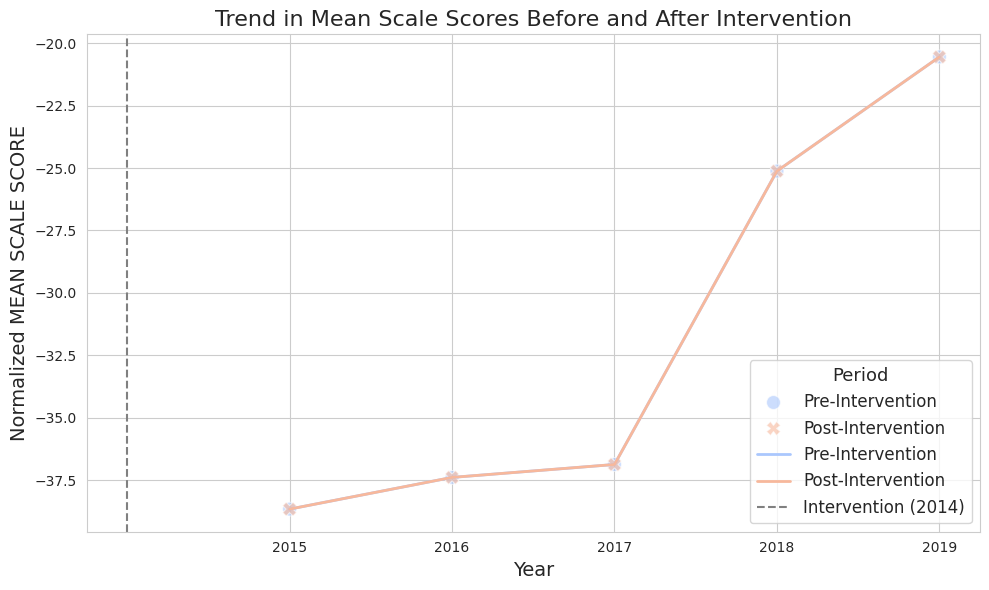

In [277]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set_style('whitegrid')

# Create a scatter plot of Year vs. Mean Scale Score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_data, x='Year', y='Normalized MEAN SCALE SCORE', hue='period', style='period', palette='coolwarm', markers=True, s=100, alpha=0.6)

# Add a line plot to show the trend over time, considering pre and post periods separately
sns.lineplot(data=combined_data, x='Year', y='Normalized MEAN SCALE SCORE', hue='period', palette='coolwarm', lw=2)

# Highlighting the intervention point
plt.axvline(x=2014, color='grey', linestyle='--', label='Intervention (2014)')

# Enhancing the plot
plt.title('Trend in Mean Scale Scores Before and After Intervention', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Normalized MEAN SCALE SCORE', fontsize=14)
plt.legend(title='Period', title_fontsize='13', fontsize='12')
plt.xticks(combined_data['Year'].unique())  # Ensure all years are shown

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
allSchools.dtypes

COUNTY CODE                   object
COUNTY NAME                   object
DISTRICT CODE                float64
DISTRICT NAME                 object
SCHOOL CODE                  float64
SCHOOL NAME                   object
DFG                           object
SUBGROUP                      object
SUBGROUP_TYPE                 object
REGISTERED TO TEST            object
NOT TESTED ** (See Below)     object
VALID SCORES                 float64
MEAN SCALE SCORE             float64
L1 PERCENT                   float64
L2 PERCENT                   float64
L3 PERCENT                   float64
L4 PERCENT                   float64
L5 PERCENT                   float64
Year                           int64
dtype: object

In [ ]:
import pandas as pd

import numpy as np

Year = [2015, 2016, 2017, 2018, 2019]
results = []

# Assuming you're filtering or updating allSchools for each year in some way
for year in Year:
    # Placeholder for actual data preparation logic
    # This line should be replaced with your actual data filtering or preparation logic for each year
    allSchools = pd.DataFrame(allSchools)



    # Assuming the score and count column names
    score_columns = ['L1 PERCENT', 'L2 PERCENT', 'L3 PERCENT',
       'L4 PERCENT', 'L5 PERCENT','MEAN SCALE SCORE']
    count_column = 'VALID SCORES'  # Column with the count of valid test takers

    # Calculate weighted sums, total test takers, and enrollment for the current year
    weighted_sums = (allSchools[score_columns].T * allSchools[count_column]).T.sum()
    total_valid_test_takers = allSchools[count_column].sum()
    total_enrollment = allSchools['REGISTERED TO TEST'].sum()

    # Calculate weighted averages for score categories
    weighted_averages = weighted_sums / total_valid_test_takers

    # Append the results for the current year to the results list
    results.append({
        'Year': Year,
        'L1': weighted_averages.get('L1 PERCENT', np.nan),
        'L2': weighted_averages.get('L2 PERCENT', np.nan),
        'L3': weighted_averages.get('L3 PERCENT', np.nan),
        'L4': weighted_averages.get('L4 PERCENT', np.nan),
        'L5': weighted_averages.get('L5 PERCENT', np.nan),
        'Mean Scale': weighted_averages.get('MEAN SCALE SCORE', np.nan),
        'Total Valid Test Takers': total_valid_test_takers,
        'Total Registed': total_enrollment
    })

# Convert the results list into a DataFrame
allSchools = pd.DataFrame(results)

# Display the results DataFrame
print(results_df)

TypeError: can only concatenate str (not "int") to str

Initally I wanted to merge on county code and district name (and district code) but decided to look just at disrtict name

In [ ]:
import numpy as np
#DistrictInfo['County Code']=DistrictInfo['County Code'].replace(-1, np.nan) #guys i guess you were trying to do this


In [ ]:
DistrictInfo['County Code'].dtypes


dtype('float64')

In [ ]:
DistrictInfo

,County Code,County Name,District Code,District Name,District Web address
0,1.0,Atlantic,10.0,Absecon Public Schools District,http://www.edline.net/pages/abseconschooldistrict
1,1.0,Atlantic,110.0,Atlantic City Public School District,http://www.acboe.org
2,1.0,Atlantic,125.0,Atlantic County Special Services School District,http://www.acsssd.net
3,1.0,Atlantic,120.0,Atlantic County Vocational School District,http://www.acitech.org
4,1.0,Atlantic,570.0,Brigantine Public Schools,http://www.brigantineschools.org
...,...,...,...,...,...
690,80.0,Union,6101.0,College Achieve Central Charter School,http://www.collegeachieve.org
691,80.0,Union,6033.0,The Barack Obama Green Charter High School,http://www.obamagreencharter.org
692,80.0,Union,7600.0,The Queen City Academy Charter School,http://www.queencity.edu
693,80.0,Union,8010.0,Union County Teams Charter School,http://www.ucteams.org


In [ ]:
# 2nd Data set relating to School districts Enrollment 2022-2021
import numpy as np
import gdown
file_id = '1aCUZ-9Yzy9zDU-XkOIyY2s10mFuhxuoR'
url = f'https://drive.google.com/uc?id={file_id}'
output_path = 'your_data.xlsx'
gdown.download(url, output_path, quiet=False)
District_enrollment = pd.read_excel(output_path)
District_enrollment.head()

Downloading...
From: https://drive.google.com/uc?id=1aCUZ-9Yzy9zDU-XkOIyY2s10mFuhxuoR
To: /content/your_data.xlsx
100%|██████████| 134k/134k [00:00<00:00, 55.8MB/s]


,County Code,County Name,District Code,District Name,Total Enrollment,White,%White,Black,%Black,Hispanic,...,Tenth Grade,Eleventh Grade,Twelfth Grade,Ungraded,%Free Lunch,%Reduced Lunch,%English Learners,%Migrant,%Military,%Homeless
0,01,Atlantic,10.0,Absecon Public Schools District,887.0,447.0,50.4,133.0,15.0,208.0,...,0.0,0.0,0.0,25.0,40.8,5.9,8.7,0.0,0.8,0.2
1,01,Atlantic,110.0,Atlantic City School District,6450.0,265.0,4.1,2147.0,33.3,2847.0,...,462.0,405.0,369.0,286.0,81.5,3.6,16.1,0.0,0.0,2.2
2,01,Atlantic,120.0,Atlantic County Vocational School District,1713.0,516.0,30.1,296.0,17.3,721.0,...,399.0,355.0,362.0,160.0,48.6,9.6,0.0,0.0,2.5,0.6
3,01,Atlantic,125.0,Atlantic County Special Services School District,306.0,95.0,31.0,82.0,26.8,108.0,...,3.0,5.0,13.0,244.0,39.5,5.9,0.3,0.0,0.3,1.0
4,01,Atlantic,570.0,Brigantine Public School District,444.0,314.0,70.7,18.0,4.1,62.0,...,0.0,0.0,0.0,12.0,33.8,8.3,3.4,0.0,2.3,0.5


Perhaps we can look at Camden early on
but we lose Charters, then look at only charters but would need to manually look for locations

In [ ]:
#CamdenCo_data= District_enrollment[District_enrollment['County Name']=='Camden']
#CamdenCo_data
#camdencharters_data = District_enrollment[District_enrollment['County Name'] == 'Charters']
#camdencharters_data


,County Code,County Name,District Code,District Name,Total Enrollment,White,%White,Black,%Black,Hispanic,...,Tenth Grade,Eleventh Grade,Twelfth Grade,Ungraded,%Free Lunch,%Reduced Lunch,%English Learners,%Migrant,%Military,%Homeless
583,80,Charters,6010.0,Academy Charter High School,156.5,2.0,1.3,78.0,49.8,73.5,...,48.0,42.5,41.5,0.0,70.9,7.7,3.5,0.0,0.0,0.0
584,80,Charters,6013.0,Bergen Arts And Science Charter School,1203.0,413.0,34.3,123.0,10.2,542.0,...,89.0,92.0,80.0,0.0,33.2,11.6,4.3,0.4,0.2,0.0
585,80,Charters,6017.0,Foundation Academy Charter School,1087.0,4.0,0.4,572.0,52.6,493.0,...,96.0,77.0,72.0,0.0,67.1,13.2,8.6,0.0,0.2,0.3
586,80,Charters,6018.0,Central Jersey College Prep Charter School,1219.0,137.0,11.2,278.0,22.8,185.0,...,44.0,45.0,43.0,0.0,14.4,6.0,2.1,0.0,0.2,0.0
587,80,Charters,6020.0,Pride Academy Charter School District,300.0,0.0,0.0,284.0,94.7,10.0,...,0.0,0.0,0.0,0.0,56.3,15.7,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,80,Charters,8010.0,Union County Teams Charter School-High School/...,400.0,1.0,0.3,242.0,60.5,153.0,...,33.0,34.0,39.0,0.0,61.3,10.0,4.0,0.0,0.0,4.8
666,80,Charters,8050.0,Unity Charter School,245.0,123.0,50.2,40.0,16.3,28.0,...,0.0,0.0,0.0,0.0,9.8,1.6,1.2,0.0,0.0,0.0
667,80,Charters,8060.0,University Academy Charter High School,439.0,18.0,4.1,240.0,54.7,142.0,...,118.0,105.0,100.0,0.0,53.3,9.8,0.0,0.0,0.0,0.0
668,80,Charters,8065.0,University Heights Charter School,858.0,0.0,0.0,724.0,84.4,133.0,...,0.0,0.0,0.0,0.0,73.1,13.9,6.4,0.0,0.0,0.0


In [ ]:
District_enrollment #aok just having look how it looks like

,County Code,County Name,District Code,District Name,Total Enrollment,White,%White,Black,%Black,Hispanic,...,Tenth Grade,Eleventh Grade,Twelfth Grade,Ungraded,%Free Lunch,%Reduced Lunch,%English Learners,%Migrant,%Military,%Homeless
0,01,Atlantic,10.0,Absecon Public Schools District,887.0,447.0,50.4,133.0,15.0,208.0,...,0.0,0.0,0.0,25.0,40.8,5.9,8.7,0.0,0.8,0.2
1,01,Atlantic,110.0,Atlantic City School District,6450.0,265.0,4.1,2147.0,33.3,2847.0,...,462.0,405.0,369.0,286.0,81.5,3.6,16.1,0.0,0.0,2.2
2,01,Atlantic,120.0,Atlantic County Vocational School District,1713.0,516.0,30.1,296.0,17.3,721.0,...,399.0,355.0,362.0,160.0,48.6,9.6,0.0,0.0,2.5,0.6
3,01,Atlantic,125.0,Atlantic County Special Services School District,306.0,95.0,31.0,82.0,26.8,108.0,...,3.0,5.0,13.0,244.0,39.5,5.9,0.3,0.0,0.3,1.0
4,01,Atlantic,570.0,Brigantine Public School District,444.0,314.0,70.7,18.0,4.1,62.0,...,0.0,0.0,0.0,12.0,33.8,8.3,3.4,0.0,2.3,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,80,Charters,8050.0,Unity Charter School,245.0,123.0,50.2,40.0,16.3,28.0,...,0.0,0.0,0.0,0.0,9.8,1.6,1.2,0.0,0.0,0.0
667,80,Charters,8060.0,University Academy Charter High School,439.0,18.0,4.1,240.0,54.7,142.0,...,118.0,105.0,100.0,0.0,53.3,9.8,0.0,0.0,0.0,0.0
668,80,Charters,8065.0,University Heights Charter School,858.0,0.0,0.0,724.0,84.4,133.0,...,0.0,0.0,0.0,0.0,73.1,13.9,6.4,0.0,0.0,0.0
669,80,Charters,8140.0,The Village Charter School,363.0,4.0,1.1,345.0,95.0,14.0,...,0.0,0.0,0.0,0.0,64.5,5.5,0.0,0.0,0.0,0.0


In [ ]:
District_enrollment['County Name']

0      Atlantic
1      Atlantic
2      Atlantic
3      Atlantic
4      Atlantic
         ...   
666    Charters
667    Charters
668    Charters
669    Charters
670         NaN
Name: County Name, Length: 671, dtype: object

In [ ]:

counties_of_interest = ["Camden", "Charters"]

CamdenChart_data = District_enrollment[District_enrollment['County Name'].isin(counties_of_interest)]


print(CamdenChart_data)


    County Code County Name  District Code  \
139          07      Camden          150.0   
140          07      Camden          190.0   
141          07      Camden          260.0   
142          07      Camden          330.0   
143          07      Camden          340.0   
..          ...         ...            ...   
665          80    Charters         8010.0   
666          80    Charters         8050.0   
667          80    Charters         8060.0   
668          80    Charters         8065.0   
669          80    Charters         8140.0   

                                         District Name  Total Enrollment  \
139                     Audubon Public School District            1444.0   
140                         Barrington School District             563.0   
141                    Bellmawr Public School District            1166.0   
142                     Berlin Borough School District             807.0   
143                    Berlin Township School District             

In [ ]:
#merged_data = pd.merge(DistrictInfo, CamdenChart_data, on='District Name',how='outer',indicator=True)
merged_data = pd.merge(DistrictInfo, CamdenChart_data, on='District Name',how='right',indicator=True)
merged_data[['District Name','_merge']]
merged_data

,County Code_x,County Name_x,District Code_x,District Name,District Web address,County Code_y,County Name_y,District Code_y,Total Enrollment,White,...,Eleventh Grade,Twelfth Grade,Ungraded,%Free Lunch,%Reduced Lunch,%English Learners,%Migrant,%Military,%Homeless,_merge
0,NaN,NaN,NaN,Audubon Public School District,NaN,07,Camden,150.0,1444.0,1235.0,...,145.0,165.0,27.0,15.6,4.4,0.8,0.0,1.0,0.4,right_only
1,7.0,Camden,190.0,Barrington School District,http://www.barringtonschools.net,07,Camden,190.0,563.0,432.0,...,0.0,0.0,11.0,19.7,4.4,0.9,0.0,1.2,0.4,both
2,7.0,Camden,260.0,Bellmawr Public School District,http://www.bellmawrschools.org,07,Camden,260.0,1166.0,671.0,...,0.0,0.0,44.0,38.3,6.2,2.3,0.0,0.6,1.1,both
3,7.0,Camden,330.0,Berlin Borough School District,http://www.bcsberlin.k12.nj.us,07,Camden,330.0,807.0,659.0,...,0.0,0.0,17.0,11.9,1.7,0.4,0.0,0.0,0.5,both
4,7.0,Camden,340.0,Berlin Township School District,http://www.btwpschools.org,07,Camden,340.0,604.0,356.0,...,0.0,0.0,18.0,33.4,5.3,4.1,0.0,1.2,1.5,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,NaN,NaN,NaN,Union County Teams Charter School-High School/...,NaN,80,Charters,8010.0,400.0,1.0,...,34.0,39.0,0.0,61.3,10.0,4.0,0.0,0.0,4.8,right_only
122,80.0,Morris,8050.0,Unity Charter School,http://www.unitycharterschool.org,80,Charters,8050.0,245.0,123.0,...,0.0,0.0,0.0,9.8,1.6,1.2,0.0,0.0,0.0,both
123,80.0,Hudson,8060.0,University Academy Charter High School,http://www.uachs.org,80,Charters,8060.0,439.0,18.0,...,105.0,100.0,0.0,53.3,9.8,0.0,0.0,0.0,0.0,both
124,80.0,Essex,8065.0,University Heights Charter School,http://www.uhcs-newark.org,80,Charters,8065.0,858.0,0.0,...,0.0,0.0,0.0,73.1,13.9,6.4,0.0,0.0,0.0,both


In [ ]:
merged_data['County Name_y'] == "Charters"

0      False
1      False
2      False
3      False
4      False
       ...  
121     True
122     True
123     True
124     True
125     True
Name: County Name_y, Length: 126, dtype: bool

Originally we wanted to use the code below to replace the missing charter values with values that exisited in the left data set, however this made some charters that only existed in the right data set be labeled as NaN.

In [ ]:
condition = merged_data['County Name_y'] == "Charters"
merged_data['County Name_y'] = merged_data['County Name_y'].where(~condition, merged_data['County Name_x'])
merged_data


,County Code_x,County Name_x,District Code_x,District Name,District Web address,County Code_y,County Name_y,District Code_y,Total Enrollment,White,...,Eleventh Grade,Twelfth Grade,Ungraded,%Free Lunch,%Reduced Lunch,%English Learners,%Migrant,%Military,%Homeless,_merge
0,NaN,NaN,NaN,Audubon Public School District,NaN,07,Camden,150.0,1444.0,1235.0,...,145.0,165.0,27.0,15.6,4.4,0.8,0.0,1.0,0.4,right_only
1,7.0,Camden,190.0,Barrington School District,http://www.barringtonschools.net,07,Camden,190.0,563.0,432.0,...,0.0,0.0,11.0,19.7,4.4,0.9,0.0,1.2,0.4,both
2,7.0,Camden,260.0,Bellmawr Public School District,http://www.bellmawrschools.org,07,Camden,260.0,1166.0,671.0,...,0.0,0.0,44.0,38.3,6.2,2.3,0.0,0.6,1.1,both
3,7.0,Camden,330.0,Berlin Borough School District,http://www.bcsberlin.k12.nj.us,07,Camden,330.0,807.0,659.0,...,0.0,0.0,17.0,11.9,1.7,0.4,0.0,0.0,0.5,both
4,7.0,Camden,340.0,Berlin Township School District,http://www.btwpschools.org,07,Camden,340.0,604.0,356.0,...,0.0,0.0,18.0,33.4,5.3,4.1,0.0,1.2,1.5,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,NaN,NaN,NaN,Union County Teams Charter School-High School/...,NaN,80,NaN,8010.0,400.0,1.0,...,34.0,39.0,0.0,61.3,10.0,4.0,0.0,0.0,4.8,right_only
122,80.0,Morris,8050.0,Unity Charter School,http://www.unitycharterschool.org,80,Morris,8050.0,245.0,123.0,...,0.0,0.0,0.0,9.8,1.6,1.2,0.0,0.0,0.0,both
123,80.0,Hudson,8060.0,University Academy Charter High School,http://www.uachs.org,80,Hudson,8060.0,439.0,18.0,...,105.0,100.0,0.0,53.3,9.8,0.0,0.0,0.0,0.0,both
124,80.0,Essex,8065.0,University Heights Charter School,http://www.uhcs-newark.org,80,Essex,8065.0,858.0,0.0,...,0.0,0.0,0.0,73.1,13.9,6.4,0.0,0.0,0.0,both


This code allowed for the charters that didnt exist in the left data set to remain labeled as charters in case it was a school we use for our work later on.

In [ ]:
condition_charters = merged_data['County Name_y'] == "Charters"
condition_notna = ~merged_data['County Name_x'].isna()

final_condition = condition_charters & condition_notna
merged_data.loc[final_condition, 'County Name_y'] = merged_data.loc[final_condition, 'County Name_x']

merged_data


,County Code_x,County Name_x,District Code_x,District Name,District Web address,County Code_y,County Name_y,District Code_y,Total Enrollment,White,...,Eleventh Grade,Twelfth Grade,Ungraded,%Free Lunch,%Reduced Lunch,%English Learners,%Migrant,%Military,%Homeless,_merge
0,NaN,NaN,NaN,Audubon Public School District,NaN,07,Camden,150.0,1444.0,1235.0,...,145.0,165.0,27.0,15.6,4.4,0.8,0.0,1.0,0.4,right_only
1,7.0,Camden,190.0,Barrington School District,http://www.barringtonschools.net,07,Camden,190.0,563.0,432.0,...,0.0,0.0,11.0,19.7,4.4,0.9,0.0,1.2,0.4,both
2,7.0,Camden,260.0,Bellmawr Public School District,http://www.bellmawrschools.org,07,Camden,260.0,1166.0,671.0,...,0.0,0.0,44.0,38.3,6.2,2.3,0.0,0.6,1.1,both
3,7.0,Camden,330.0,Berlin Borough School District,http://www.bcsberlin.k12.nj.us,07,Camden,330.0,807.0,659.0,...,0.0,0.0,17.0,11.9,1.7,0.4,0.0,0.0,0.5,both
4,7.0,Camden,340.0,Berlin Township School District,http://www.btwpschools.org,07,Camden,340.0,604.0,356.0,...,0.0,0.0,18.0,33.4,5.3,4.1,0.0,1.2,1.5,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,NaN,NaN,NaN,Union County Teams Charter School-High School/...,NaN,80,Charters,8010.0,400.0,1.0,...,34.0,39.0,0.0,61.3,10.0,4.0,0.0,0.0,4.8,right_only
122,80.0,Morris,8050.0,Unity Charter School,http://www.unitycharterschool.org,80,Morris,8050.0,245.0,123.0,...,0.0,0.0,0.0,9.8,1.6,1.2,0.0,0.0,0.0,both
123,80.0,Hudson,8060.0,University Academy Charter High School,http://www.uachs.org,80,Hudson,8060.0,439.0,18.0,...,105.0,100.0,0.0,53.3,9.8,0.0,0.0,0.0,0.0,both
124,80.0,Essex,8065.0,University Heights Charter School,http://www.uhcs-newark.org,80,Essex,8065.0,858.0,0.0,...,0.0,0.0,0.0,73.1,13.9,6.4,0.0,0.0,0.0,both


checking to see if there were any charters that were not matched with a county name, are we missing any values? Charters remained charters if no match found, now we can easily go through later if needed

In [ ]:

chartersmerged = merged_data[merged_data['County Name_y'] == 'Charters']

chartersmerged

,County Code_x,County Name_x,District Code_x,District Name,District Web address,County Code_y,County Name_y,District Code_y,Total Enrollment,White,...,Eleventh Grade,Twelfth Grade,Ungraded,%Free Lunch,%Reduced Lunch,%English Learners,%Migrant,%Military,%Homeless,_merge
40,NaN,NaN,NaN,Bergen Arts And Science Charter School,NaN,80,Charters,6013.0,1203.0,413.0,...,92.0,80.0,0.0,33.2,11.6,4.3,0.4,0.2,0.0,right_only
43,NaN,NaN,NaN,Pride Academy Charter School District,NaN,80,Charters,6020.0,300.0,0.0,...,0.0,0.0,0.0,56.3,15.7,0.0,0.0,0.0,0.0,right_only
52,NaN,NaN,NaN,The Barack Obama Green Charter High School Dis...,NaN,80,Charters,6033.0,240.0,3.0,...,45.0,102.0,0.0,71.7,8.8,7.1,0.0,0.0,0.0,right_only
54,NaN,NaN,NaN,Hatikvah International Academy Charter School,NaN,80,Charters,6041.0,546.0,284.0,...,0.0,0.0,0.0,4.6,0.4,2.9,0.4,0.4,0.5,right_only
55,NaN,NaN,NaN,Great Oaks Legacy Charter School,NaN,80,Charters,6053.0,1880.0,3.0,...,98.0,94.0,0.0,73.8,9.8,2.1,0.1,0.0,0.0,right_only
56,NaN,NaN,NaN,Peoples Preparatory Charter School District,NaN,80,Charters,6057.0,403.0,0.0,...,93.0,70.0,0.0,70.2,4.0,5.2,0.0,1.0,1.0,right_only
58,NaN,NaN,NaN,Atlantic Community Charter School,NaN,80,Charters,6060.0,354.0,4.0,...,0.0,0.0,0.0,92.7,3.1,3.4,0.0,0.3,2.0,right_only
62,NaN,NaN,NaN,John P Holland Charter School,NaN,80,Charters,6079.0,548.0,0.0,...,0.0,0.0,0.0,83.2,8.8,2.6,0.7,0.5,0.0,right_only
66,NaN,NaN,NaN,Hope Community Charter School,NaN,80,Charters,6086.0,132.0,1.0,...,0.0,0.0,0.0,92.4,4.5,5.3,0.0,0.0,2.3,right_only
68,NaN,NaN,NaN,Jersey City Global Charter School,NaN,80,Charters,6093.0,507.0,17.0,...,0.0,0.0,0.0,0.0,0.0,4.5,1.0,0.0,0.0,right_only


In [ ]:
county_name = "Camden"
CamdenCounty_Districts = merged_data[merged_data['County Name_y'] == county_name]
print(CamdenCounty_Districts)

#CamdenCounty_Districts = new dataset for us to use
CamdenCounty_Districts.columns

    County Code_x County Name_x  District Code_x  \
0             NaN           NaN              NaN   
1             7.0        Camden            190.0   
2             7.0        Camden            260.0   
3             7.0        Camden            330.0   
4             7.0        Camden            340.0   
5             7.0        Camden            390.0   
6             7.0        Camden            580.0   
7             NaN           NaN              NaN   
8             7.0        Camden            700.0   
9             7.0        Camden            800.0   
10            7.0        Camden            880.0   
11            7.0        Camden            940.0   
12            7.0        Camden           1255.0   
13            NaN           NaN              NaN   
14            7.0        Camden           1770.0   
15            NaN           NaN              NaN   
16            NaN           NaN              NaN   
17            NaN           NaN              NaN   
18          

Index(['County Code_x', 'County Name_x', 'District Code_x', 'District Name',
       'District Web address', 'County Code_y', 'County Name_y',
       'District Code_y', 'Total Enrollment', 'White', '%White', 'Black',
       '%Black', 'Hispanic', '%Hispanic', 'Asian', '%Asian', 'Native American',
       '%Native American', 'Hawaiian Native', '%Hawaiian Native',
       'Two or More Races', '%Two or More Races', 'Pre-K Halfday',
       'Pre-K FullDay', 'Kindergarten Halfday', 'Kindergarten Fullday',
       'First Grade', 'Second Grade', 'Third Grade', 'Fourth Grade',
       'Fifth Grade', 'Sixth Grade', 'Seventh Grade', 'Eight Grade',
       'Ninth Grade', 'Tenth Grade', 'Eleventh Grade', 'Twelfth Grade',
       'Ungraded', '%Free Lunch', '%Reduced Lunch', '%English Learners',
       '%Migrant', '%Military', '%Homeless', '_merge'],
      dtype='object')

We remove some columns to simplify our data set, only leaving 9th grade as that is the grade of test scores for the nextg data set

In [ ]:
selected_columns = ['District Name', 'County Name_y','Total Enrollment', 'White', '%White', 'Black',
       '%Black', 'Hispanic', '%Hispanic', 'Asian', '%Asian', 'Native American',
       '%Native American', 'Hawaiian Native', '%Hawaiian Native',
       'Two or More Races', '%Two or More Races',
       'Ninth Grade','%Free Lunch', '%Reduced Lunch', '%English Learners',
       '%Migrant']


In [ ]:
new_CamdenCountyInfo = CamdenCounty_Districts[selected_columns]
new_CamdenCountyInfo

,District Name,County Name_y,Total Enrollment,White,%White,Black,%Black,Hispanic,%Hispanic,Asian,...,%Native American,Hawaiian Native,%Hawaiian Native,Two or More Races,%Two or More Races,Ninth Grade,%Free Lunch,%Reduced Lunch,%English Learners,%Migrant
0,Audubon Public School District,Camden,1444.0,1235.0,85.5,47.0,3.3,109.0,7.5,16.0,...,0.3,2.0,0.1,30.0,2.1,143.0,15.6,4.4,0.8,0.0
1,Barrington School District,Camden,563.0,432.0,76.7,29.0,5.2,48.0,8.5,24.0,...,0.5,3.0,0.5,24.0,4.3,0.0,19.7,4.4,0.9,0.0
2,Bellmawr Public School District,Camden,1166.0,671.0,57.5,48.0,4.1,256.0,22.0,130.0,...,0.0,1.0,0.1,60.0,5.1,0.0,38.3,6.2,2.3,0.0
3,Berlin Borough School District,Camden,807.0,659.0,81.7,57.0,7.1,26.0,3.2,29.0,...,0.2,0.0,0.0,34.0,4.2,0.0,11.9,1.7,0.4,0.0
4,Berlin Township School District,Camden,604.0,356.0,58.9,73.0,12.1,114.0,18.9,52.0,...,0.0,0.0,0.0,9.0,1.5,0.0,33.4,5.3,4.1,0.0
5,Black Horse Pike Regional School District,Camden,3478.0,1840.0,52.9,914.0,26.3,391.0,11.2,227.0,...,0.2,11.0,0.3,89.0,2.6,853.0,27.5,4.7,1.4,0.0
6,Brooklawn Public School District,Camden,285.0,157.0,55.1,41.0,14.4,52.0,18.2,13.0,...,0.7,2.0,0.7,18.0,6.3,0.0,51.9,7.0,4.6,0.0
7,Camden City School District,Camden,7343.0,68.0,0.9,3134.0,42.7,4006.0,54.6,69.0,...,0.0,14.0,0.2,50.0,0.7,319.0,62.6,1.2,10.6,0.0
8,Camden County Technical School District,Camden,2245.0,664.0,29.6,538.0,24.0,884.0,39.4,77.0,...,0.1,1.0,0.0,78.0,3.5,609.0,47.8,8.0,0.3,0.0
9,Cherry Hill School District,Camden,10469.0,5774.0,55.2,921.0,8.8,1414.0,13.5,1821.0,...,0.1,22.0,0.2,504.0,4.8,864.0,15.6,2.8,3.4,0.0


In [ ]:
new_CamdenCountyInfo[['District Name']]

,District Name
156,Audubon Public School Disrict
157,Barrington School District
158,Bellmawr Public School District
159,Berlin Borough School District
160,Berlin Township School District
161,Black Horse Pike Regional School District
162,Brooklawn Public School District
163,Camden City Public Schools
164,Camden County Educational Services Commission
165,Camden County Technical School District


In [ ]:
ELA9[['District Name']]

,District Name
0,Leap Academy University Charter School
1,Audubon Public School District
2,Black Horse Pike Regional School District
3,Camden City School District
4,Camden County Technical School District
5,Cherry Hill School District
6,Collingswood Public School District
7,Eastern Camden County Regional School District
8,Gloucester City Public School District
9,Kipp: Cooper Norcross A New Jersey Nonprofit C...


Now we merge right with ELA9 so that we have a smaller data set looking only at our districts of interest

In [ ]:
CamdenDistricts_ELA9 = pd.merge(new_CamdenCountyInfo, ELA9, how='right', on=['District Name'],indicator=True)
CamdenDistricts_ELA9[['District Name','_merge']]


,District Name,_merge
0,Leap Academy University Charter School,both
1,Audubon Public School District,both
2,Black Horse Pike Regional School District,both
3,Camden City School District,both
4,Camden County Technical School District,both
5,Cherry Hill School District,both
6,Collingswood Public School District,both
7,Eastern Camden County Regional School District,both
8,Gloucester City Public School District,both
9,Kipp: Cooper Norcross A New Jersey Nonprofit C...,both


In [ ]:
CamdenDistricts_ELA9

,District Name,County Name_y,Total Enrollment,White,%White,Black,%Black,Hispanic,%Hispanic,Asian,...,%Hawaiian Native,Two or More Races,%Two or More Races,Ninth Grade,%Free Lunch,%Reduced Lunch,%English Learners,%Migrant,ELA Score,_merge
0,Leap Academy University Charter School,Camden,1557.0,2.0,0.1,634.0,40.7,903.0,58.0,17.0,...,0.0,1.0,0.1,129.0,77.4,7.7,7.1,0.3,725,both
1,Audubon Public School District,Camden,1444.0,1235.0,85.5,47.0,3.3,109.0,7.5,16.0,...,0.1,30.0,2.1,143.0,15.6,4.4,0.8,0.0,747,both
2,Black Horse Pike Regional School District,Camden,3478.0,1840.0,52.9,914.0,26.3,391.0,11.2,227.0,...,0.3,89.0,2.6,853.0,27.5,4.7,1.4,0.0,735,both
3,Camden City School District,Camden,7343.0,68.0,0.9,3134.0,42.7,4006.0,54.6,69.0,...,0.2,50.0,0.7,319.0,62.6,1.2,10.6,0.0,706,both
4,Camden County Technical School District,Camden,2245.0,664.0,29.6,538.0,24.0,884.0,39.4,77.0,...,0.0,78.0,3.5,609.0,47.8,8.0,0.3,0.0,752,both
5,Cherry Hill School District,Camden,10469.0,5774.0,55.2,921.0,8.8,1414.0,13.5,1821.0,...,0.2,504.0,4.8,864.0,15.6,2.8,3.4,0.0,828,both
6,Collingswood Public School District,Camden,2200.0,1323.0,60.1,247.0,11.2,450.0,20.5,56.0,...,0.0,117.0,5.3,196.0,26.9,3.2,1.9,0.0,739,both
7,Eastern Camden County Regional School District,Camden,1926.0,1144.0,59.4,221.0,11.5,195.0,10.1,269.0,...,0.1,90.0,4.7,483.0,5.9,1.2,0.9,0.0,753,both
8,Gloucester City Public School District,Camden,2220.0,1372.0,61.8,251.0,11.3,451.0,20.3,113.0,...,0.0,30.0,1.4,142.0,56.4,7.8,1.8,0.0,750,both
9,Kipp: Cooper Norcross A New Jersey Nonprofit C...,Camden,1775.0,5.0,0.3,985.0,55.5,721.0,40.6,1.0,...,0.3,44.0,2.5,238.0,90.1,7.0,7.8,0.0,716,both
